In [1]:
import wbgapi as wb
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using the World Bank API to pull data on GDP per capita and urban population for all available economies and years. This is the main df from which the other dataframes will be based on.

wdi_full = wb.data.DataFrame(
    series = ["NY.GDP.PCAP.CD", "SP.URB.TOTL.IN.ZS"], 
    economy = 'all', 
    time = 'all',
    index=['time','economy']).reset_index()

column_titles = {
    "NY.GDP.PCAP.CD":"GDP per capita (US$)", 
    "SP.URB.TOTL.IN.ZS":"Urban population (%)",
    }

wdi_full.rename(columns = column_titles, inplace=True)
wdi_full

,time,economy,GDP per capita (US$),Urban population (%)
0,YR1960,ABW,NaN,50.776000
1,YR1960,AFE,186.121835,14.577252
2,YR1960,AFG,NaN,8.401000
3,YR1960,AFW,121.939925,14.710006
4,YR1960,AGO,NaN,10.435000
...,...,...,...,...
17285,YR2024,XKX,7299.434981,NaN
17286,YR2024,YEM,NaN,40.477000
17287,YR2024,ZAF,6253.371582,69.298000
17288,YR2024,ZMB,1235.084665,46.914000


In [3]:
# convverting years from string into integer:

wdi_full['time'] = wdi_full.loc[:,'time'].str.replace("YR", "").astype(int)
wdi_full.dtypes

time                      int32
economy                  object
GDP per capita (US$)    float64
Urban population (%)    float64
dtype: object

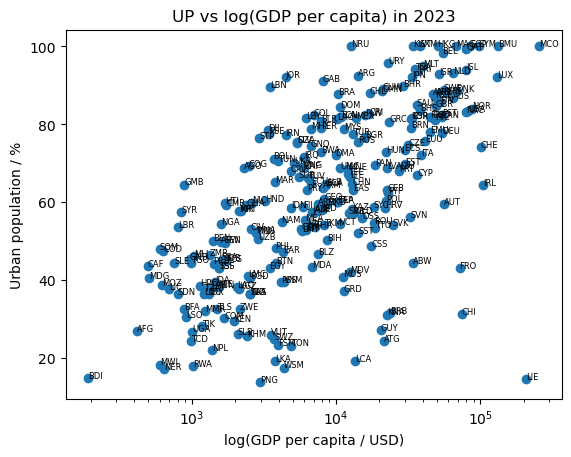

In [11]:
wdi_2023 = wdi_full[wdi_full['time']==2023]
x = wdi_2023['GDP per capita (US$)']
y = wdi_2023['Urban population (%)']
labels = wdi_2023['economy']

plt.scatter(x,y, label=labels)
plt.xscale('log')
for label, x, y in zip(labels, x ,y):
    plt.annotate(label, xy=(x,y), fontsize =6)

#grid(True)

plt.xlabel('log(GDP per capita / USD)')
plt.ylabel('Urban population / %')
plt.title('UP vs log(GDP per capita) in 2023')
plt.show()

In [12]:
economies = wb.economy.DataFrame(id='all', labels=False, skipAggs=False, db=None)
economies

,name,aggregate,longitude,latitude,region,adminregion,lendingType,incomeLevel,capitalCity
id,,,,,,,,,
ABW,Aruba,False,-70.0167,12.51670,LCN,,LNX,HIC,Oranjestad
AFE,Africa Eastern and Southern,True,NaN,NaN,,,,,
AFG,Afghanistan,False,69.1761,34.52280,MEA,MNA,IDX,LIC,Kabul
AFW,Africa Western and Central,True,NaN,NaN,,,,,
AGO,Angola,False,13.2420,-8.81155,SSF,SSA,IBD,LMC,Luanda
...,...,...,...,...,...,...,...,...,...
XKX,Kosovo,False,20.9260,42.56500,ECS,ECA,IDX,UMC,Pristina
YEM,"Yemen, Rep.",False,44.2075,15.35200,MEA,MNA,IDX,LIC,Sana'a
ZAF,South Africa,False,28.1871,-25.74600,SSF,SSA,IBD,UMC,Pretoria


In [13]:
countries_df = economies[economies['aggregate']==False][['name','adminregion','incomeLevel']]
countries_df

,name,adminregion,incomeLevel
id,,,
ABW,Aruba,,HIC
AFG,Afghanistan,MNA,LIC
AGO,Angola,SSA,LMC
ALB,Albania,ECA,UMC
AND,Andorra,,HIC
...,...,...,...
XKX,Kosovo,ECA,UMC
YEM,"Yemen, Rep.",MNA,LIC
ZAF,South Africa,SSA,UMC


In [14]:
countries_df.adminregion.value_counts()
# As can be seen from the value_counts below, the admin region for some countries is blank. 

adminregion
       88
SSA    46
LAC    22
EAP    22
ECA    18
MNA    15
SAS     6
Name: count, dtype: int64

In [15]:
# Replacing blanks with nulls (easier to handle):

countries_df = countries_df.replace('', np.nan)

# Filtering the countries_df to select all rows where adminregion is NA in order to get a list of all countries without a classification:
blanks = countries_df[countries_df['adminregion'].isna()]['name'].tolist()

# This list was used to created the dictionary below. 
missing_regions = {
    'Aruba':'LAC' ,
'Andorra':'ECA',
'United Arab Emirates':'MNA',
'American Samoa':'EAP',
'Antigua and Barbuda':'LAC',
'Australia':'EAP',
'Austria':'ECA',
'Belgium':'ECA',
'Bulgaria':'ECA',
'Bahrain':'MNA',
'Bahamas, The':'LAC',
'Bermuda':'NAC',
'Barbados':'LAC',
'Brunei Darussalam':'EAP',
'Canada':'NAC',
'Switzerland':'ECA',
'Channel Islands':'ECA',
'Chile':'LAC',
'Costa Rica':'LAC',
'Curacao':'LAC',
'Cayman Islands':'LAC',
'Cyprus':'ECA',
'Czechia':'ECA',
'Germany':'ECA',
'Denmark':'ECA',
'Spain':'ECA',
'Estonia':'ECA',
'Ethiopia':'SSA',
'Finland':'ECA',
'France':'ECA',
'Faroe Islands':'ECA',
'United Kingdom':'ECA',
'Gibraltar':'ECA',
'Greece':'ECA',
'Greenland':'ECA',
'Guam':'EAP',
'Guyana':'LAC',
'Hong Kong SAR, China':'EAP',
'Croatia':'ECA',
'Hungary':'ECA',
'Isle of Man':'ECA',
'Ireland':'ECA',
'Iceland':'ECA',
'Israel':'MNA',
'Italy':'ECA',
'Japan':'EAP',
'St. Kitts and Nevis':'LAC',
'Korea, Rep.':'EAP',
'Kuwait':'MNA',
'Liechtenstein':'ECA',
'Lithuania':'ECA',
'Luxembourg':'ECA',
'Latvia':'ECA',
'Macao SAR, China':'EAP',
'St. Martin (French part)':'LAC',
'Monaco':'ECA',
'Malta':'MNA',
'Northern Mariana Islands':'EAP',
'New Caledonia':'EAP',
'Netherlands':'ECA',
'Norway':'ECA',
'Nauru':'EAP',
'New Zealand':'EAP',
'Oman':'MNA',
'Panama':'LAC',
'Palau':'EAP',
'Poland':'EAP',
'Puerto Rico (US)':'LAC',
'Portugal':'ECA',
'French Polynesia':'EAP',
'Qatar':'MNA',
'Romania':'ECA',
'Russian Federation':'ECA',
'Saudi Arabia':'MNA',
'Singapore':'EAP',
'San Marino':'ECA',
'Slovak Republic':'ECA',
'Slovenia':'ECA',
'Sweden':'ECA',
'Sint Maarten (Dutch part)':'LAC',
'Seychelles':'SSA',
'Turks and Caicos Islands':'LAC',
'Trinidad and Tobago':'LAC',
'Uruguay':'LAC',
'United States':'NAC',
'Venezuela, RB':'LAC',
'British Virgin Islands':'LAC',
'Virgin Islands (U.S.)':'LAC'
}

# Using the dictionary and the map function to fill in NAs and reassigning the column so the changes reflect in the dataframe:
countries_df["adminregion"] = countries_df["adminregion"].fillna(countries_df["name"].map(missing_regions))

# Saving the final state of the dataframe as a copy and resetting index:
countries = countries_df.reset_index().copy()
countries

,id,name,adminregion,incomeLevel
0,ABW,Aruba,LAC,HIC
1,AFG,Afghanistan,MNA,LIC
2,AGO,Angola,SSA,LMC
3,ALB,Albania,ECA,UMC
4,AND,Andorra,ECA,HIC
...,...,...,...,...
212,XKX,Kosovo,ECA,UMC
213,YEM,"Yemen, Rep.",MNA,LIC
214,ZAF,South Africa,SSA,UMC
215,ZMB,Zambia,SSA,LMC


In [16]:
countries.isna().sum() # checking if all nulls have been filled in

id             0
name           0
adminregion    0
incomeLevel    0
dtype: int64

In [17]:
wdi_2023 # this is the df that contains all 2023 info

,time,economy,GDP per capita (US$),Urban population (%)
16758,2023,ABW,33984.790620,44.254000
16759,2023,AFE,1510.742951,38.424898
16760,2023,AFG,413.757895,26.933000
16761,2023,AFW,1599.392983,49.711184
16762,2023,AGO,2309.534130,68.688000
...,...,...,...,...
17019,2023,XKX,6221.203652,NaN
17020,2023,YEM,NaN,39.831000
17021,2023,ZAF,6022.542542,68.819000
17022,2023,ZMB,1330.727806,46.335000


In [18]:
# merging wdi_2023 with the countries df that contains info about the economies. This way, it will be possible to include info such as admin region and
# income level on plot.
merged_df = pd.merge(wdi_2023, countries, left_on='economy', right_on='id') 

# contries df contains a column called id (containing all the country codes). This column is already present in the wdi_2023 so we can drop it:
merged_df.drop('id', axis=1, inplace=True) 
merged_df

,time,economy,GDP per capita (US$),Urban population (%),name,adminregion,incomeLevel
0,2023,ABW,33984.790620,44.254,Aruba,LAC,HIC
1,2023,AFG,413.757895,26.933,Afghanistan,MNA,LIC
2,2023,AGO,2309.534130,68.688,Angola,SSA,LMC
3,2023,ALB,8575.171346,64.603,Albania,ECA,UMC
4,2023,AND,46812.448449,87.774,Andorra,ECA,HIC
...,...,...,...,...,...,...,...
212,2023,XKX,6221.203652,NaN,Kosovo,ECA,UMC
213,2023,YEM,NaN,39.831,"Yemen, Rep.",MNA,LIC
214,2023,ZAF,6022.542542,68.819,South Africa,SSA,UMC
215,2023,ZMB,1330.727806,46.335,Zambia,SSA,LMC


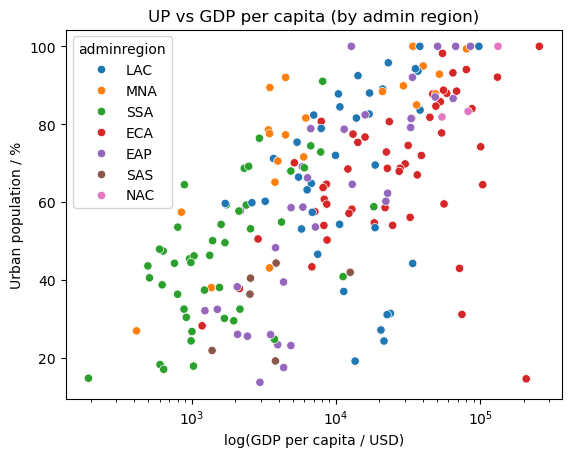

In [19]:
sns.scatterplot(
    data=merged_df,
    x='GDP per capita (US$)',
    y='Urban population (%)',
    hue='adminregion'
    
)

plt.xscale('log')
plt.xlabel('log(GDP per capita / USD)')
plt.ylabel('Urban population / %')
plt.title('UP vs GDP per capita (by admin region)')
plt.show()

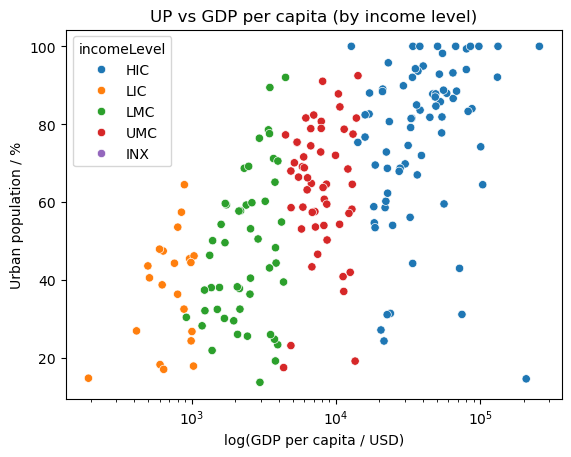

In [20]:
sns.scatterplot(
    data=merged_df,
    x='GDP per capita (US$)',
    y='Urban population (%)',
    hue='incomeLevel'
    
)

plt.xscale('log')
plt.xlabel('log(GDP per capita / USD)')
plt.ylabel('Urban population / %')
plt.title('UP vs GDP per capita (by income level)')
plt.show()

LIC: low-income \
LMC: Lower-middle income \
UMC: Upper middle income \
HIC: high-income 

In [21]:
# Calculation the Pearson correlation coefficient to quatinify the linear relationship between the log of GDP per capita and urban population.
correlation = merged_df['Urban population (%)'].corr(np.log(merged_df['GDP per capita (US$)']))
correlation

0.6265504632472492

A value of 0.63 indicates a moderately positive linear relationship between the two metrics. However it can also be seen that there is some scattering of some data points from where the line of best fit would be. 


Now let's determine the position of the line of best fit, starting from below:

In [22]:
merged_df.shape

(217, 7)

In [23]:
print(merged_df['GDP per capita (US$)'].isna().sum())
print(merged_df['Urban population (%)'].isna().sum())
# Some

17
2


In [24]:
# Selecting only the rows which contain data for both GDP and UP. (In other words, removing rows where GDP and Urban population are both missing (otherwise cannot calculate line of best fit))

alldata_2023 = merged_df[~(merged_df['GDP per capita (US$)'].isna()) & ~(merged_df['Urban population (%)'].isna())]
alldata_2023.shape

(199, 7)

In [25]:
# Determing the gradient and intercept of the line of best fit for the 2023 data

x_values = np.log(alldata_2023['GDP per capita (US$)'])
y_values = alldata_2023['Urban population (%)']

polyfit_results = np.polyfit(x_values, y_values, 1)
polyfit_results 

array([  9.83448849, -26.95907974])

In [26]:
# I would like to plot the line of best fit on the scatter plot. To do this, we need to use the gradient, intercept, and x-values to calculate the y-values that lie on the line of best fit.

arr = np.array(list(zip(x_values, y_values)))
# First pairing the x and y values and turning the list into an array. 

print(arr)
print(polyfit_results)

[[ 10.43366837  44.254     ]
 [  6.02528101  26.933     ]
 [  7.74480111  68.688     ]
 [  9.05662625  64.603     ]
 [ 10.75390444  87.774     ]
 [ 10.80040574  87.779     ]
 [  9.56011536  92.463     ]
 [  9.00273472  63.739     ]
 [  9.97555457  24.332     ]
 [ 11.07961505  86.617     ]
 [ 10.93370632  59.53      ]
 [  8.87249116  57.577     ]
 [  5.2578823   14.784     ]
 [ 10.90943788  98.189     ]
 [  7.24006016  50.1       ]
 [  6.78297385  32.52      ]
 [  7.84424767  40.473     ]
 [  9.6730589   76.701     ]
 [ 10.28500582  89.869     ]
 [ 10.55142224  83.625     ]
 [  9.06681904  50.269     ]
 [  8.97420705  80.731     ]
 [  8.91731045  46.608     ]
 [ 11.79512583 100.        ]
 [  8.21237309  71.186     ]
 [  9.24740388  87.788     ]
 [ 10.07760996  31.425     ]
 [ 10.40094064  79.149     ]
 [  8.25307381  44.35      ]
 [  8.96525201  72.867     ]
 [  6.20653338  43.614     ]
 [ 10.90081118  81.862     ]
 [ 11.51922362  74.202     ]
 [ 11.21975017  31.159     ]
 [  9.74490419

In [27]:
# Substituting into y = mx + c. Reassigning the new y-values to arr:

arr[:,1] = (arr[:,0] * polyfit_results[0]) + polyfit_results[1]
print(arr)

[[10.43366837 75.65071179]
 [ 6.02528101 32.29647701]
 [ 7.74480111 49.20707765]
 [ 9.05662625 62.10820696]
 [10.75390444 78.80006974]
 [10.80040574 79.25738622]
 [ 9.56011536 67.05976474]
 [ 9.00273472 61.57821133]
 [ 9.97555457 71.14539693]
 [11.07961505 82.00326699]
 [10.93370632 80.56832929]
 [ 8.87249116 60.2973325 ]
 [ 5.2578823  24.74950329]
 [10.90943788 80.32966158]
 [ 7.24006016 44.24320864]
 [ 6.78297385 39.74799853]
 [ 7.84424767 50.18508374]
 [ 9.6730589  68.17050667]
 [10.28500582 74.18869171]
 [10.55142224 76.8087609 ]
 [ 9.06681904 62.20844783]
 [ 8.97420705 61.29765627]
 [ 8.91731045 60.73810724]
 [11.79512583 89.03994956]
 [ 8.21237309 53.80540892]
 [ 9.24740388 63.98440735]
 [10.07760996 72.14905949]
 [10.40094064 75.3288513 ]
 [ 8.25307381 54.20567966]
 [ 8.96525201 61.20958796]
 [ 6.20653338 34.07900138]
 [10.90081118 80.24482241]
 [11.51922362 86.32659239]
 [11.21975017 83.38142426]
 [ 9.74490419 68.87706841]
 [ 9.46894205 66.16312188]
 [ 7.84567953 50.19916532]
 

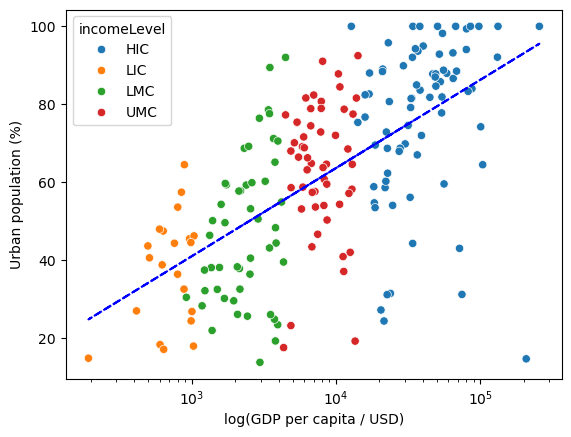

In [29]:
plt.plot(np.exp(arr[:,0]), arr[:,1], 'b--')

sns.scatterplot(
    data=alldata_2023,
    x='GDP per capita (US$)',
    y='Urban population (%)',
    hue='incomeLevel'   
)

plt.xscale('log')
plt.xlabel('log(GDP per capita / USD)')
plt.show()